In [22]:
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load saved model and test data

In [23]:
model = load_model('../data/models/model.h5')

In [24]:
x_test = np.load('../data/processed/x_test.npy')
y_test = np.load('../data/processed/y_test.npy')

## Create predictions

In [30]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

20/20 [==============================] - 25s 1s/step


## Analyze predictions

In [34]:
rep = classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)'])
print(rep)

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.82      0.99      0.90       390
   Normal (Class 1)       0.97      0.65      0.77       234

           accuracy                           0.86       624
          macro avg       0.90      0.82      0.84       624
       weighted avg       0.88      0.86      0.85       624



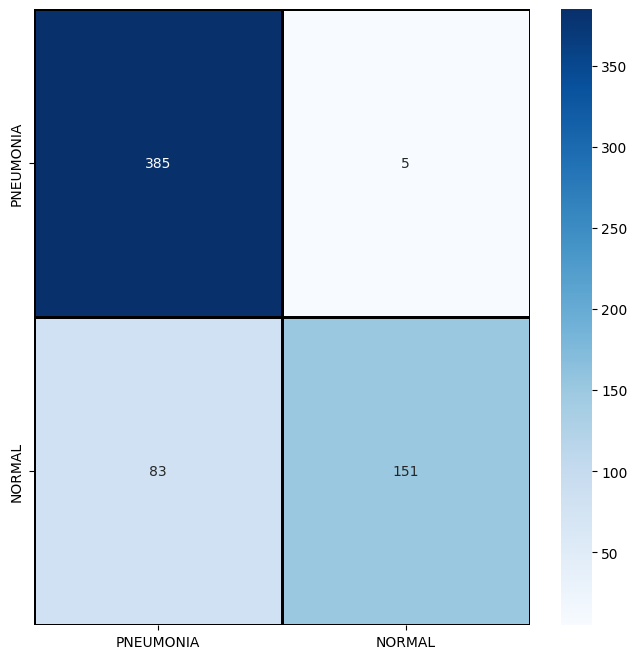

In [40]:
labels = ['PNEUMONIA', 'NORMAL']
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test,predictions),cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.show()